# Ismétlés.

- OOP: öröklödés. Látunk rá egy rövid példát.
- `numpy`. Numerikus python könyvtár. Legfontosabb típusa a ,,tömb'', `ndarray`.
    
   * A tömb típus legfontosabb attribútumai: `shape`, `dtype`.

   * tömb létrehozása: `np.array`, `np.zeros`, `np.ones`, `np.empty`, `np.full`
     (létezik `_like` változat is, amikor az `dtype`, `shape` attribútumokat egy másik tömb alapján állítja be).


Műveletek:

- Elemenkénti műveletek: aritmetikai, logikai, bit műveletek elemenként értendőek.

- Broadcasting: Ha két tömb alakja kompatibilis, akkor nincs gond az elemenkénti műveletekkel. Szabály: 
     
  * A rövidebb `shape` kiegészül egyesekkel az elején.
     
  * Ha a két `shape` azonos hosszúságú, akkor az azonos tengelyek vagy egyforma méretűek, vagy legalább az egyik egyes.
    
- mátrix szorzás: `@`, `np.matmul`.

- tömb műveletek: `sum`, `min`, `max`.
  
  * ezeknek lehet `axis` paraméterük. Melyik tengely mentén végezzük el az összevonást?

   

### Tömbök összefűzése

In [1]:
import numpy as np

In [2]:
A = np.arange(15).reshape(3, 5)

B = np.zeros(shape=(3, 5), dtype=np.int_)

In [3]:
# np.vstack((A, B))
np.concatenate((A, B), axis=0)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0]])

In [11]:
# np.hstack((A, B))
np.concatenate((A, B[:,:3]), axis=1)

array([[ 0,  1,  2,  3,  4,  0,  0,  0],
       [ 5,  6,  7,  8,  9,  0,  0,  0],
       [10, 11, 12, 13, 14,  0,  0,  0]])

In [10]:
np.stack((A, B)).shape

(3, 5, 2)

### Egyszerűbb statisztikai függvények

In [12]:
v = np.array([1, 4, 3, 5, 35, 0, -1, 2])

$$
\overline v \equiv \text{mean}(v) = \frac{\sum_{i=1}^n v_i}{n},
\quad
\text{std}(v) = \sqrt{\frac{\sum_{i=1}^n (v_i - \overline{v})^2}{n}}
$$

In [13]:
print(f"összeg: {np.sum(v)}, átlag: {np.mean(v):.3f}")
print(f"medián: {np.median(v)}, szórás: {np.std(v):.3f}")
print(f"szórásnégyzet (variancia): {np.var(v):.3f}")

összeg: 49, átlag: 6.125
medián: 2.5, szórás: 11.073
szórásnégyzet (variancia): 122.609


In [14]:
A = np.array([[1,  2,  3],
              [10, 11, 12],
              [0,  3,  1],
              [10, -5, 1]])
A

array([[ 1,  2,  3],
       [10, 11, 12],
       [ 0,  3,  1],
       [10, -5,  1]])

In [15]:
# A.sum()
np.sum(A)

49

In [16]:
# Elemek abszolútértékeinek összege
np.sum(np.abs(A))

59

In [17]:
# elemek átlaga
np.mean(A)

4.083333333333333

In [18]:
# elemek szórása
np.std(A)

5.122797629767894

In [19]:
# elemek szórásnégyzete
np.var(A)

26.243055555555554

Többdimenziós tömböknél azonban érdekelhet minket a sorösszeg / oszlopösszeg, a sorátlag / oszlopátlag, stb. is.

In [20]:
print(A.shape)
# ez tehát az oszlopösszeg
np.sum(A, axis=0)

(4, 3)


array([21, 11, 17])

In [22]:
print(np.sum(A[1]))
# ez a sorösszeg
np.sum(A, axis=1)

33


array([ 6, 33,  4,  6])

In [23]:
# A keletkező vektor egyik dimenziója azonban eltűnt, 
# a sorösszeg egy 1-dimenziós vektor lett
row_sums = np.sum(A, axis=1, keepdims=True)
print(row_sums.shape)
row_sums

(4, 1)


array([[ 6],
       [33],
       [ 4],
       [ 6]])

In [25]:
# Hasonlóan, oszlopátlagot is számolhatunk
np.mean(A, axis=0, keepdims=True)

array([[5.25, 2.75, 4.25]])

In [26]:
A

array([[ 1,  2,  3],
       [10, 11, 12],
       [ 0,  3,  1],
       [10, -5,  1]])

In [27]:
# melyik tengely mentén rendez a `sort`, ha nem adunk meg semmit?
np.sort(A)

array([[ 1,  2,  3],
       [10, 11, 12],
       [ 0,  1,  3],
       [-5,  1, 10]])

In [28]:
np.sort(A, axis=0)

array([[ 0, -5,  1],
       [ 1,  2,  1],
       [10,  3,  3],
       [10, 11, 12]])

In [29]:
help(np.sort)

Help on _ArrayFunctionDispatcher in module numpy:

sort(a, axis=-1, kind=None, order=None)
    Return a sorted copy of an array.
    
    Parameters
    ----------
    a : array_like
        Array to be sorted.
    axis : int or None, optional
        Axis along which to sort. If None, the array is flattened before
        sorting. The default is -1, which sorts along the last axis.
    kind : {'quicksort', 'mergesort', 'heapsort', 'stable'}, optional
        Sorting algorithm. The default is 'quicksort'. Note that both 'stable'
        and 'mergesort' use timsort or radix sort under the covers and, in general,
        the actual implementation will vary with data type. The 'mergesort' option
        is retained for backwards compatibility.
    
        .. versionchanged:: 1.15.0.
           The 'stable' option was added.
    
    order : str or list of str, optional
        When `a` is an array with fields defined, this argument specifies
        which fields to compare first, second,

## Lineáris algebra és alkalmazásai

In [30]:
A = np.array([[2, 4, 1], [2, 6, -1], [1, 5, 2]])
b = np.array([4, 10, 2])

In [32]:
print(f"Az A mátrix determinánsa {np.linalg.det(A)}")
A

Az A mátrix determinánsa 17.999999999999996


array([[ 2,  4,  1],
       [ 2,  6, -1],
       [ 1,  5,  2]])

Hogy lehet egy egész elemű mátrix determinánsa nem egész?

In [33]:
qr = np.linalg.qr(A)
print(qr.Q)
print("-"*10)
print(qr.R)
print("-"*10)
print(np.prod(qr.R.diagonal()))

[[-0.66666667  0.56591646  0.48507125]
 [-0.66666667 -0.16169042 -0.72760688]
 [-0.33333333 -0.80845208  0.48507125]]
----------
[[-3.         -8.33333333 -0.66666667]
 [ 0.         -2.74873708 -0.88929729]
 [ 0.          0.          2.18282063]]
----------
17.999999999999996


In [34]:
print(qr.Q.T @ qr.Q)
print("-"*10)
print(qr.Q @ qr.R)

[[ 1.00000000e+00  6.69261714e-17 -9.19661107e-17]
 [ 6.69261714e-17  1.00000000e+00  2.84706714e-17]
 [-9.19661107e-17  2.84706714e-17  1.00000000e+00]]
----------
[[ 2.  4.  1.]
 [ 2.  6. -1.]
 [ 1.  5.  2.]]


In [35]:
import functools

def prod(iterable):
    return functools.reduce(lambda a, b: a*b, iterable, 1)

def det3(A):
    assert A.shape == (3, 3)
    return sum(
        prod(A[j, (j+i) % 3] for j in range(3)) 
        - 
        prod(A[j, (i-j) % 3] for j in range(3))
        for i in range(3) 
    )

In [36]:
det3(A)

18

In [37]:
# Az A mátrix inverze
np.linalg.inv(A), np.linalg.inv(A) @ A

(array([[ 0.94444444, -0.16666667, -0.55555556],
        [-0.27777778,  0.16666667,  0.22222222],
        [ 0.22222222, -0.33333333,  0.22222222]]),
 array([[ 1.00000000e+00, -2.22044605e-16,  0.00000000e+00],
        [-2.77555756e-17,  1.00000000e+00,  5.55111512e-17],
        [ 5.55111512e-17,  1.11022302e-16,  1.00000000e+00]]))

In [38]:
# Az Ax = b lineáris egyenletrendszer megoldása:
x = np.linalg.solve(A, b)
x

array([ 1.,  1., -2.])

In [39]:
print(f"{A @ x=}, {b=}")

A @ x=array([ 4., 10.,  2.]), b=array([ 4, 10,  2])


**Feladat**: Adott két numpy vektor, `a = np.array([1,2,3,2,3,4,3,4,5,6])` és `b = np.array([7,2,10,2,7,4,9,4,9,8])`, állítsuk elő azt a vektort, ami a közös elemeket tartalmazza. (Keressünk numpy függvényeket erre a célra.)


**Feladat**: Készítsünk egy $3\times 3$-mas mátrixot, ami $2$ és $4$ közötti véletlen számokat tartalmaz. (Nézzük meg az `np.random` modul függvényeit.)

**Feladat**: Az alábbi mátrix tartalmaz végtelen értékeket is. Töröljük azokat az oszlopokat, amelyekben szerepel végtelen érték. Hogyan kaphatjuk meg azon oszlopok indexeit, amely tartalmaz végtelen értéket?

```python
A = np.array([
    [1,      2,       3, 14], 
    [2, np.inf,      -4,  0], 
    [3,      4, -np.inf, -3]
])
```

**Feladat**: Adott mátrixra számoljuk ki minden sorra a sorbeli minimum és maximum értékek hányadosát.

A `numpy` egy nagy könyvtár, minden részletét megismerni valószínűleg felesleges, megtanulni valószínűleg lehetetlen. 

Ha valamire szükségünk van, akkor érdemes utánanézni, hogyan oldható meg.

- [`numpy` dokumentáció](https://numpy.org/doc)

- [`numpy` tutorials](https://numpy.org/numpy-tutorials/features.html)

- [`numpy` howtos](https://numpy.org/doc/1.26/user/howtos_index.html)

- [web3c numpy](https://www.w3schools.com/python/numpy/default.asp)

# Adatok vizualizációja, `plot`s

Azonban akár képekkel, akár idősorokkal dolgozunk, nehéz tájékozódni vizuális segítség nélkül. 

A Python leggyakrabban használt plot-könyvtára a `matplotlib`.

Néhány erre épülő könyvtár:

- `seaborn` kényelmes statisztikai ábrák

- `plotnine` kényelmes statisztikai ábrák, (a `ggplot2` `R` csomag pythonos megfelelője).

Javascript-re épülő interaktív grafika jupyter notebookban:

- `plotly`.

- `gravis` gráfok megjelenítésére.

Statikus gráf megjelenítés: `graphviz`.

## Néhány példa függvény ábrára

In [40]:
import matplotlib.pyplot as plt

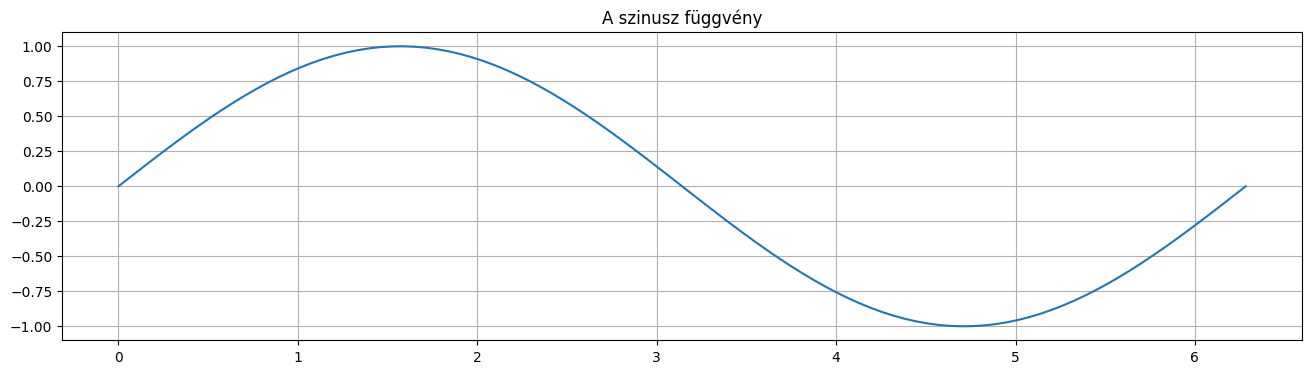

In [42]:
plt.figure(figsize=(16, 4))
xs = np.linspace(0, 2*np.pi, 100)
plt.plot(xs, np.sin(xs))
plt.title("A szinusz függvény")
plt.grid(); plt.show() 

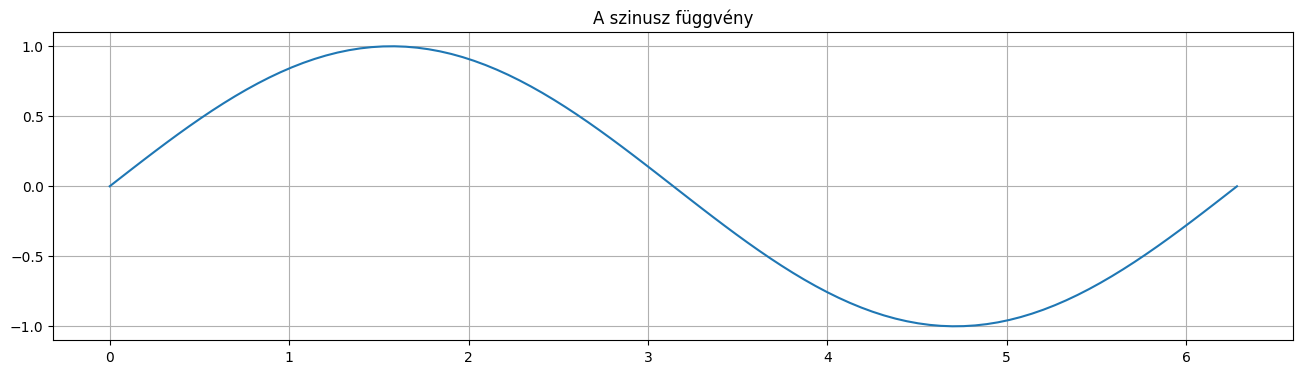

In [44]:
plt.figure(figsize=(16, 4))
xs = np.linspace(0, 2*np.pi, 100)
plt.plot(xs, np.sin(xs))
plt.yticks([-1, -0.5, 0, 0.5, 1.0])
plt.title("A szinusz függvény"); plt.grid(); plt.show()

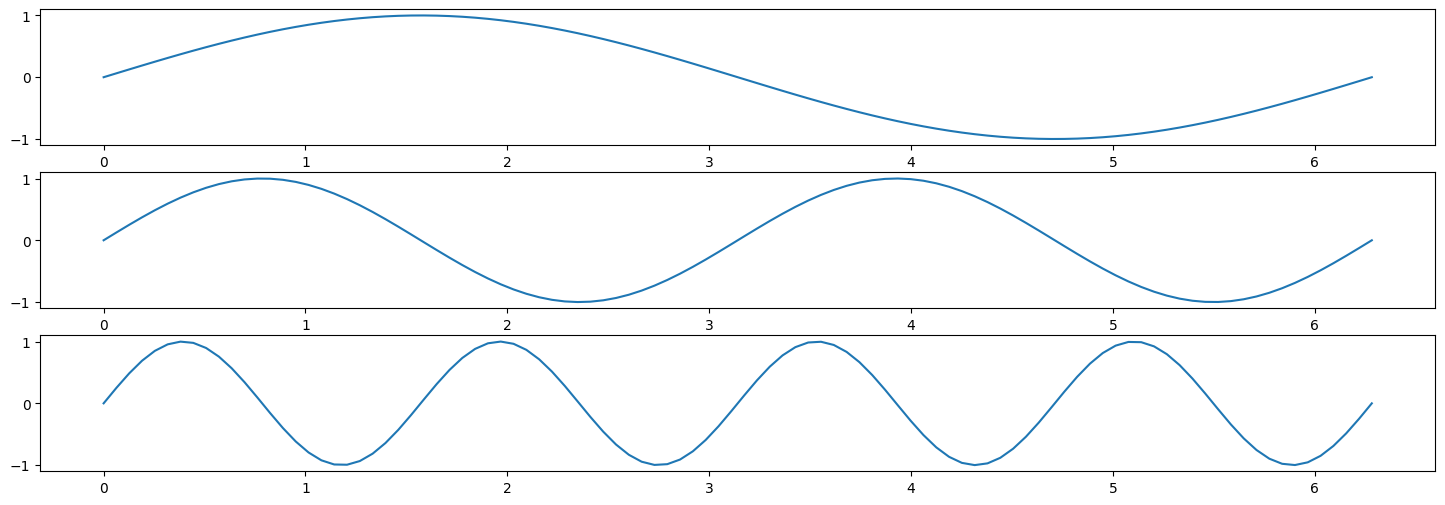

In [46]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(18, 6))
xs = np.linspace(0, 2*np.pi, 100)
ax[0].plot(xs, np.sin(xs))
ax[1].plot(xs, np.sin(2*xs))
ax[2].plot(xs, np.sin(4*xs))
plt.show()

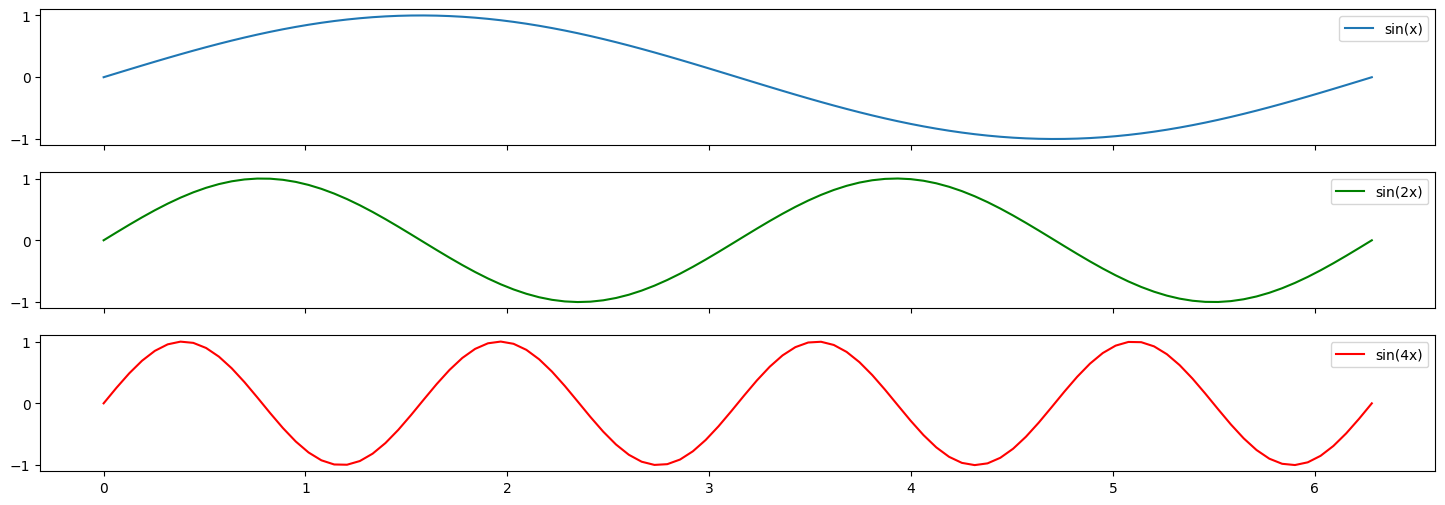

In [48]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(18, 6), sharex=True)
xs = np.linspace(0, 2*np.pi, 100)
ax[0].plot(xs, np.sin(xs), label="sin(x)")
ax[0].legend(loc="upper right")
ax[1].plot(xs, np.sin(2*xs), c="g", label="sin(2x)")
ax[1].legend(loc="upper right")
ax[2].plot(xs, np.sin(4*xs), c="r", label="sin(4x)")
ax[2].legend(loc="upper right")
plt.show()


# Faktoriális értékének közelítése

Mekkora $n!$, ha $n$ nagy?

Ötlet:
$$
    \log n! = \sum_{k=1}^n \log k \approx \int_1^{?} \log x dx = \left[ x(\log x-1)\right]_{x=1}^{x=?}
$$

In [49]:
import matplotlib.pyplot as plt
import math
import numpy as np

def subdivision(a, b, n):
    return np.linspace(a, b, n+1)

def add_function_curve(f, a, b, n=100):
    xs = subdivision(a, b, n)
    fxs = np.vectorize(f)(xs) 
    plt.plot(xs, fxs, "r-")

## Téglalap közelítés

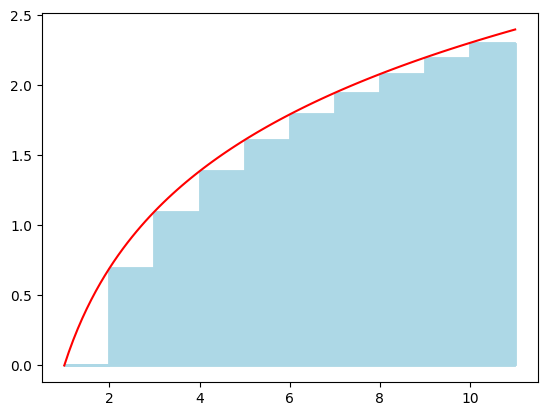

In [51]:
k_values = range(1, 11)
for k in k_values:
    plt.fill_between([k+i for k in k_values for i in range(2)], 
                     [math.log(k) for k in k_values for i in range(2)], 
                     color='lightblue')
add_function_curve(math.log, 1, 11)

## A téglalap közelítéssel elkövetett hiba:

In [52]:
def primitive_function(x):
    return x*(math.log(x)-1)

def rectangle_error(k):
    return primitive_function(k+1)-primitive_function(k)-math.log(k)

def cummulative_error(n, error_fun=rectangle_error):
    return sum(error_fun(k) for k in range(1, n+1))

In [53]:
for n in [10, 100, 1000]:
    print(f"{n=}, {cummulative_error(n)=}")

n=10, cummulative_error(n)=1.2724354277065621
n=100, cummulative_error(n)=2.387796645403718
n=1000, cummulative_error(n)=3.53535560637252


### Javítás, trapéz összeg közelítés

Téglalapok helyett minden egység intervallumon a beírt trapézt  használjuk.

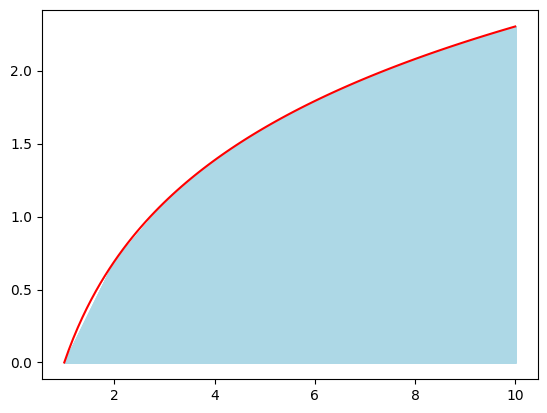

In [55]:
k_values = range(1, 11) 
for k in k_values:
    plt.fill_between(k_values, [math.log(k) for k in k_values], color='lightblue')
add_function_curve(math.log, 1, 10)

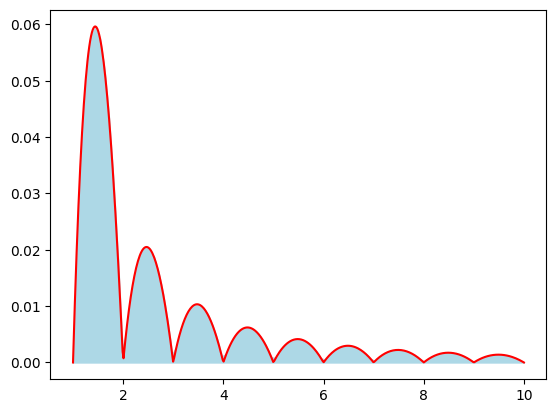

In [57]:
def error_fun(x):
    k, t = divmod(x, 1)
    return math.log(x) - ((1-t)*math.log(k) + t*math.log(k+1))

xs = subdivision(1, 10, 100)
plt.fill_between(xs, [error_fun(x) for x in xs], color='lightblue')
add_function_curve(error_fun, 1, 10, 500)

In [58]:
def modified_error_fun(x):
    k = x//1
    return k*k*error_fun(x)

def show_modified_error(a):
    b = a+10
    xs = subdivision(a, b, 1000)
    plt.fill_between(xs, [modified_error_fun(x) for x in xs], color='lightblue')
    add_function_curve(modified_error_fun, a, b, 1000)
    plt.show()

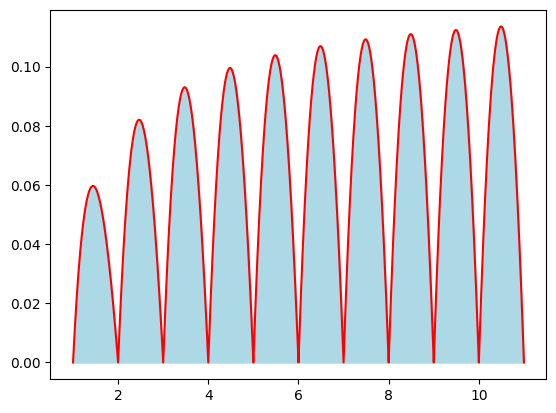

In [59]:
show_modified_error(1)

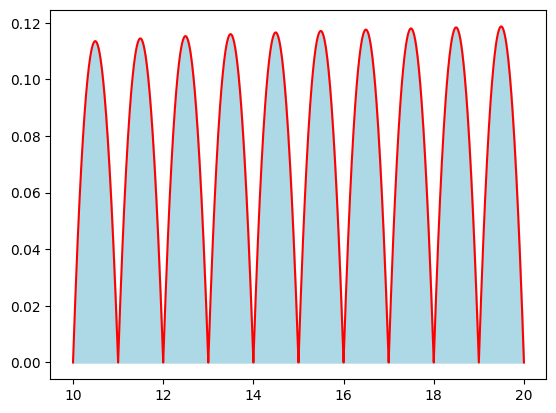

In [60]:
show_modified_error(10)

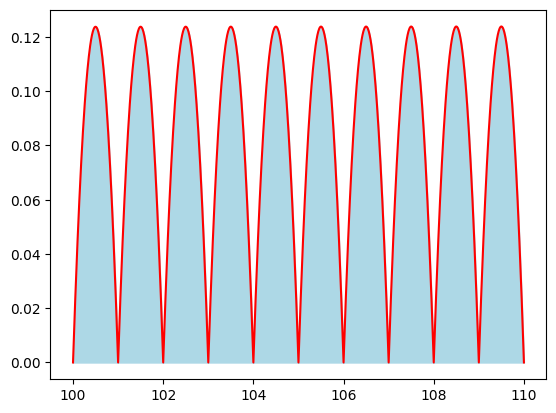

In [61]:
show_modified_error(100)

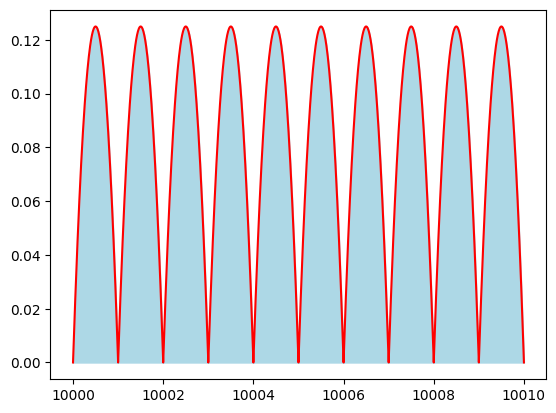

In [62]:
show_modified_error(10000)

In [63]:
def trapezoid_error(k):
    return primitive_function(k+1)-primitive_function(k)-0.5*(math.log(k)+math.log(k+1))


In [65]:
for n in [10, 100, 1000]:
    print(f"{n = :>4}, {cummulative_error(n, trapezoid_error) = :.8f}")
    

n =   10, cummulative_error(n, trapezoid_error) = 0.07348779
n =  100, cummulative_error(n, trapezoid_error) = 0.08023639
n = 1000, cummulative_error(n, trapezoid_error) = 0.08097822


## Látszik, hogy a hiba lassan nő. Tudunk-e felső becslést adni rá?

$$
    \int_{k}^{k+1} \log x dx = \int_0^1 \log(k+x) dx
$$

A beírt trapéz területe integrállal

$$
    \int_0^1 x\log(k+1)+(1-x)\log(k) dx
$$

Tudjuk-e becsülni a két integrandus különbségét?

$$
    \log(k+x) - (x\log(k+1)+(1-x)\log(k)) 
    = \log\left(1+\frac xk\right) - x\log\left(1+\frac 1k\right)
$$


A logaritmus függvény konkáv, a derivált monoton fogy ($1/x$) és egy beírt húr mindig a végponthoz behúzott érintő egyenesek alatt van.

$$
    \log (1+x)\leq x
$$

ezért
$$
    0\leq \log\left(1+\frac xk\right) - x \log\left(1+\frac1k\right)\leq 
\frac xk + x\log\left(\frac{k}{k+1}\right) 
\leq x\left(\frac1k-\frac1{k+1}\right)
$$
<!-- 
de
$$
    \log(1+1/k) = \log\frac{k+1}{k} = -\log\frac{k}{k+1} = -\log(1-1/(k+1)) \geq \frac1{k+1}
$$
 
Így

$$
    \log(1+x/k) - x \log(1+1/k)\leq x\left(\frac1k-\frac1{k+1}\right)
$$
-->
és a $k$. intervallumon elkövetett hiba legfeljebb
$$
    \int_{0}^{1} \log(k+x) - ((1-x)\log(k)+x\log(k+1))dx = \int_0^1 x dx \left(\frac1k -\frac1{k+1}\right)
$$
A hibák összege legfeljebb:
$$
    \frac12 \sum_{k=1}^\infty \frac1k -\frac1{k+1} =\frac12
$$

**Összefoglalva**:

$$
    \log n! = \int_1^n \log x dx + \frac12 \log n + r_n =
    \log\left(\sqrt{n}\left(\frac{n}{e}\right)^n\right) + 1 + r_n
$$
ahol $r_n$ a közelítés hibája az első $n$ intervallumon
$$
    r_n = \sum_{k=1}^n \int_0^1 \log(1+x/k)-x\log(1+1/k)dx \leq 1/2
$$
$(r_n)$ monoton nő, ezért létezik limesze.

Visszaírva faktoriálisra:

$$
    n! = \sqrt{n}\left(\frac{n}{e}\right)^n c_n
$$
ahol $c_n=e^{1+r_n}\leq e^{3/2}$

Analízisben a **Wallis** formulaként szerepel a következő eredmény:
$$
    \lim_{n\to\infty} \sqrt{n}\frac{1}{2^{2n}} \binom{2n}{n} =\frac{1}{\sqrt{\pi}}
$$


**HF** Írjuk be a faktoriális fenti alakját, a Wallis formulába, használjuk ki, hogy $(c_n)$ konvergens és számítsuk ki, hogy
$$
\lim c_n = \sqrt{2\pi}
$$

Ez a nevezetes **Stirling** formula:
$$
 \frac{n!}{\sqrt{2\pi n}\left(\frac{n}{e}\right)^n} \to 1
$$

## Maximum eloszlása szimmetrikus bolyongásnál


Szimmetrikus bolyongás alatt olyan véletlen sorozatot értünk, ami a nullából indul és minden lépése (megváltozása 1 vagy −1, 1/2–1/2 valószínűséggel a többi lépéstől függetlenül.

**Cél**:

- Írjunk egy függvényt, ami a numpy könyvtár függvényei segítségével elkészíti $n$ hosszú bolyongásoknak egy $m$ elemű sorozatát! Azaz a függvény kimenete egy $m\times n$ mátrix, az egyes sorok az egyes bolyongásokat írják le.

- Rajzoljunk ki néhány bolyongást! 
- Készítsünk hisztogramot a bolyongások utolsó pozíciójából (ez a függvény által visszakapott mátrix utolsó oszlopa). 
- Készítsünk hisztogramot a bolyongások maximális értékéből is (ezek a mátrixunk soronkénti maximumai). 

In [66]:
import numpy as np
import matplotlib.pyplot as plt

def random_walk(n, m=1):
    steps = np.where(np.random.binomial(1, 0.5, size=(m, n-1)), 1, -1)
    # steps = 2*np.random.binomial(1, 0.5, size=(m, n-1))-1
    walk = np.zeros((m, n), dtype=np.int32)
    steps.cumsum(axis=1, out=walk[:,1:])
    return walk

In [67]:
random_walk(10)

array([[0, 1, 2, 3, 4, 5, 4, 5, 4, 5]], dtype=int32)

In [68]:
import ipytest
ipytest.autoconfig()

In [69]:
%%ipytest

def test_random_walk():
    rw = random_walk(10)
    assert rw.shape == (1,10)

    rw = random_walk(100)
    assert set(np.diff(rw[0])) == {-1, 1}
  
    rw = random_walk(100, 1000)
    assert (rw[:, 0]==0).all()



.                                                                                            [100%]
1 passed in 0.01s


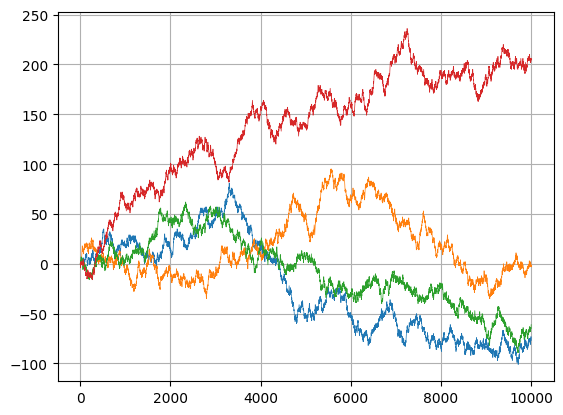

In [71]:
rw = random_walk(10000, 4)
for i in range(4):
    plt.plot(rw[i], linewidth=0.5)
plt.grid()
plt.show()

In [72]:
rw = random_walk(101, 200000) # 100 lépés, 200_000 elemű minta

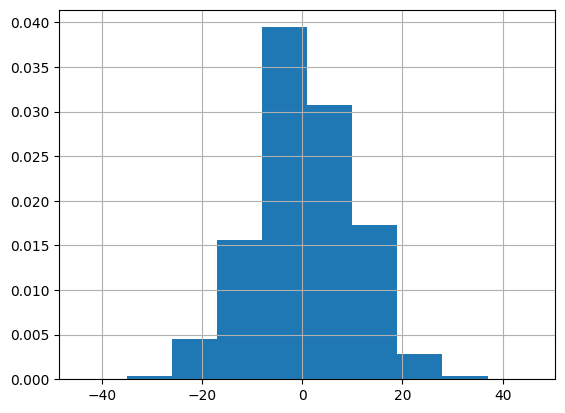

In [73]:
rw_last  =  rw[:, -1]
plt.hist(rw_last, density=True)
plt.grid()
plt.show()

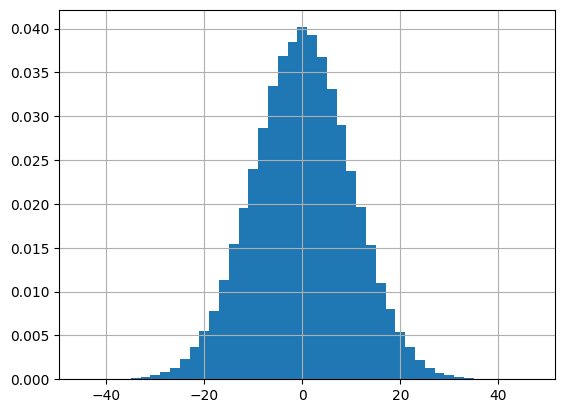

In [74]:

bins = np.arange(rw_last.min()-1, rw_last.max()+2, 2)
plt.hist(rw_last, bins, density=True)
plt.grid()
plt.show()

In [76]:
rw_max = rw.max(axis=1)
print(rw_max.shape)

(200000,)


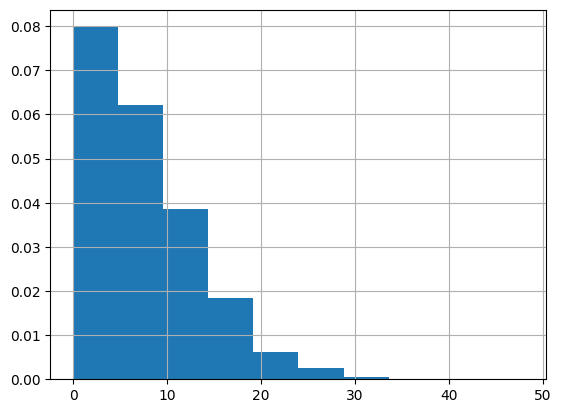

In [77]:
plt.hist(rw_max, density=True)
plt.grid(); plt.show()

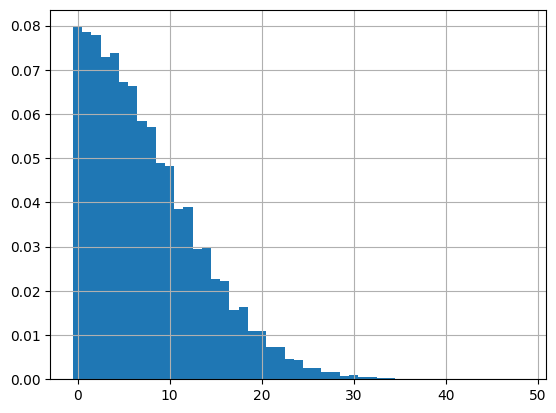

In [78]:
bins = np.arange(rw_max.max()+2)-0.5
plt.hist(rw_max, bins, density=True)
plt.grid(); plt.show()

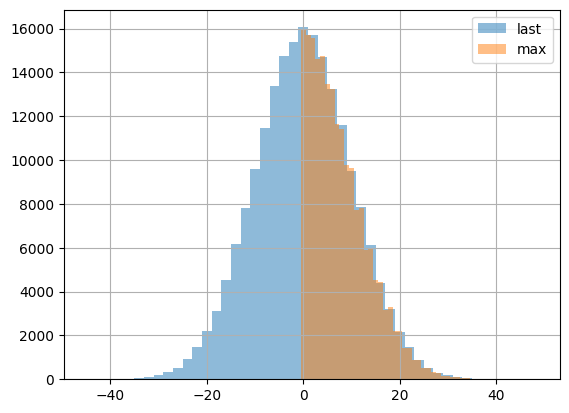

In [80]:
bins = np.arange(rw_last.min()-1, rw_last.max()+2, 2)
plt.hist(rw_last, bins, alpha=0.5, label="last")
bins = np.arange(0,rw_max.max()+2, 1)-0.5
plt.hist(rw_max, bins, alpha=0.5, label="max")
plt.grid(); plt.legend(); plt.show()

## Magyarázat

A két ábra nagyon hasonlít, a maximumok hisztogrammja olyan mint felső ábra pozitív fele.

A szimmetikus bolyongás egy véletlen sorozat, a szokásos jelölés $(S_k)_{0\leq k\leq n}$.

A maximum eloszlása pl. tükrözési elvvel számolható. $\ell\geq0$-ra:

$$
\mathbb{P}(\max_{k\leq n} S_k\geq x) =
\mathbb{P}(\max_{k\leq n} S_k\geq x,\, S_n\geq x) +
\mathbb{P}(\max_{k\leq n} S_k\geq x,\, S_n<x)
$$

A második taggal kell foglalkozni. Nézzük azt az esetet, amikor $S_n=y< x$.

Minden lehetséges út egyformán valószínű ($1/2^n$). Így az  a kérdés, hány olyan út van ami $(0,0)$-ból $(n,y)$-ba, aminek maximuma legalább $x$. Az ilyen utak a *jó* utak.

Egy jó út esetén legyen $t$ az első olyan index, amikor az $x$ szinten jár, és a $t$ utáni lépéseket fordítsuk az ellentettjükre.

In [81]:
rw_max = rw.max(axis=1)
x = 8
idx = np.where((rw_last<x) & (rw_max>=x))[0]

if len(idx)>0:
    idx = idx.min()
    rw0 = rw[idx]
    t = np.where(rw0==x)[0].min()
    rw1 = np.zeros_like(rw0)
    rw1[:t+1] = rw0[:t+1]
    rw1[t+1:] = 2*rw0[t]-rw0[t+1:]
else:
    print("nincs a feltételnek megfelelő bolyongás")

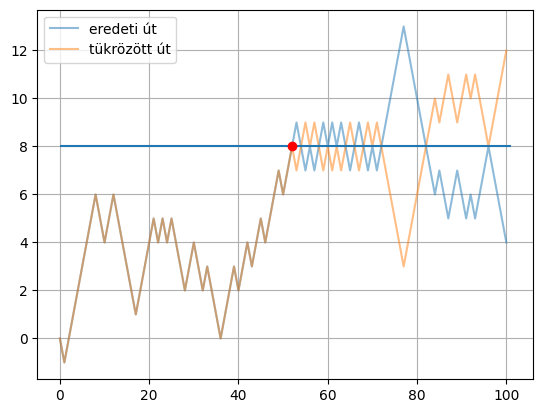

In [82]:
plt.plot(rw0, label="eredeti út", alpha=0.5)
plt.plot(rw1, label="tükrözött út", alpha=0.5)
plt.hlines([x], 0, len(rw0))
plt.plot(t, x, 'ro')
plt.grid(); plt.legend(); plt.show()

Ha $x\geq 0$ és $y<x$, akkor
a fenti hozzárendelés bijekció azon utak között, amik $(0,0)$-ból $(n,y)$-ba mennek és közben járnak $x$ magasságban és azon utak között, amik
$(0,0)$-ból $(n,2x-y)$ mennek. A tükrözött útból úgy kaphatjuk vissza az eredetit, hogy $t$ a tükrözött útból is megkapható, mint az első olyan index, amikor az $x$ szinten jár a bolyongás, és a $t$ utáni növekményeket $-1$-gyel szorozzuk.

$$
\begin{aligned}
\mathbb{P}(\max_{k\leq n} S_k\geq x) &=
\mathbb{P}(\max_{k\leq n} S_k\geq x,\, S_n\geq x) +
\mathbb{P}(\max_{k\leq n} S_k\geq x,\, S_n<x)\\
&= \mathbb{P}(S_n\geq x) +
\mathbb{P}(S_n>x)
\end{aligned}
$$

Ebből
$$
\mathbb{P}(\max_{k\leq n} S_k = x) = \mathbb{P}(S_n = x) + \mathbb{P}(S_n = x+1)
$$



A *tükrözési elvből* valójában az jött ki, hogy:

$$
\mathbb{P}(\max_{k\leq n} S_k\geq x,\, S_n\leq y)= \mathbb{P}(S_n\geq 2x-y),\quad\text{ha $x\geq 0$ és $y\leq x$}
$$

Ebből, ha $x\geq 0$ és $y\leq x$

$$
\begin{aligned}
\mathbb{P}(\max_{k\leq n} S_k = x,\, S_n\leq y) 
& = \mathbb{P}(S_n\geq 2x-y)- \mathbb{P}(S_n\geq 2x-y+2)\\
& = \mathbb{P}(S_n = 2x-y)+\mathbb{P}(S_n = 2x-y+1)\\
\mathbb{P}(\max_{k\leq n} S_k = x,\, S_n = y) &
= \mathbb{P}(S_n = 2x-y)+\mathbb{P}(S_n = 2x-y+1) \\
&\hphantom{{}={}} - (\mathbb{P}(S_n = 2x-(y-1))+\mathbb{P}(S_n = 2x-(y-1)+1))\\
& = \mathbb{P}(S_n = 2x-y)-\mathbb{P}(S_n = 2x-y+2)
\end{aligned}
$$




A `plt.hist` függvény használata helyett célszerű magunknak kigyűjteni a gyakoriságokat.

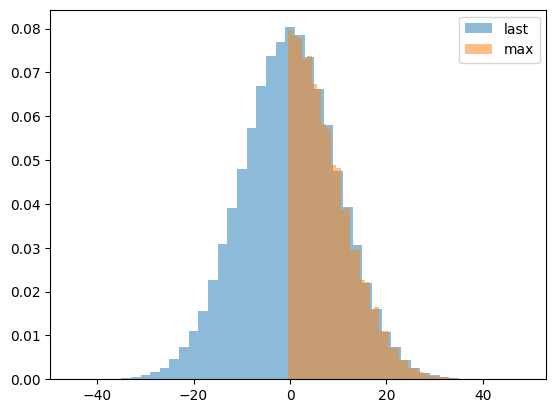

In [84]:
rw_last_values, rw_last_cnts = np.unique(rw_last, return_counts=True)
rw_last_probs = rw_last_cnts/rw_last_cnts.sum()

rw_max_values, rw_max_cnts = np.unique(rw_max, return_counts=True)
rw_max_probs = rw_max_cnts/rw_max_cnts.sum()

plt.bar(rw_last_values, rw_last_probs, width=2, alpha=0.5, label='last')
plt.bar(rw_max_values, rw_max_probs, width=1, alpha=0.5, label='max')
plt.legend()
plt.show()

Be tudjuk-e rajzolni a haranggörbét?

Ehhez egyrészt használhatjuk a `scipy.stats` `norm` objektumának `pdf` (probablity density function) metódusát. Vagy megírhatjuk magunk is.

Vegyük észre, hogy 100 lépés után az átlag 0  a szórás $10=\sqrt{100}$. Pl. a generált mintában ezek az értékek:

In [85]:
print(f"minta átlag = {rw_last.mean():.3f}, minta szórása={rw_last.std():.3f}")

minta átlag = -0.008, minta szórása=10.014


In [86]:
from scipy.stats import norm as gauss

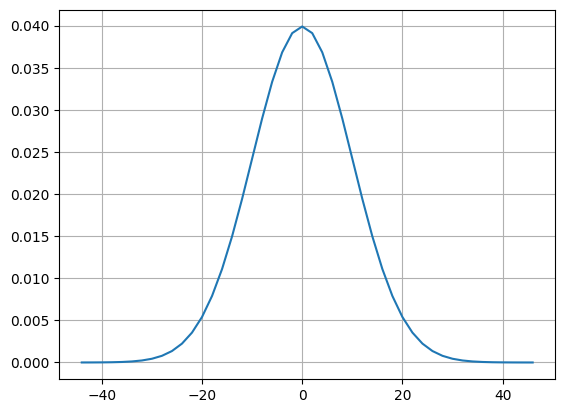

In [87]:
sigma = (rw.shape[1]-1)**0.5
plt.plot(rw_last_values, gauss.pdf(rw_last_values, 0, sigma))
plt.grid()
plt.show()

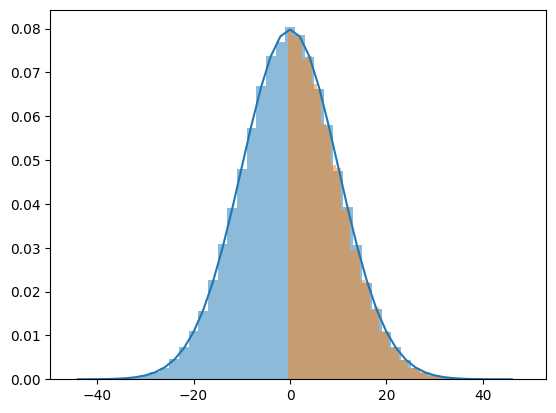

In [88]:
plt.bar(rw_last_values, rw_last_probs, width=2, alpha=0.5)
plt.bar(rw_max_values, rw_max_probs, width=1, alpha=0.5)
plt.plot(rw_last_values, 2*gauss.pdf(rw_last_values, 0, sigma))
plt.show()

## Utolsó nullhely.

Szimmetrikus bolyongás alatt olyan véletlen sorozatot értünk, ami a nullából indul és minden lépése (megváltozása) 1 vagy −1, 1/2–1/2
valószínűséggel a többi lépéstől függetlenül.

**Cél**:

- Minden bolyongásra számoljuk ki az utolsó nulla érték indexét és ezt osszuk el a bolyongás hosszával. 

- Készítsünk hisztogramot az így kapott értékekből.

- Van-e olyan szép függvény, ami illeszkedik a hisztogram alakjára.

In [89]:
np.nonzero?

In [92]:
np.where(rw[0]==0)[0], rw[0]

(array([ 0,  2, 36]),
 array([ 0, -1,  0,  1,  2,  3,  4,  5,  6,  5,  4,  5,  6,  5,  4,  3,  2,
         1,  2,  3,  4,  5,  4,  5,  4,  5,  4,  3,  2,  3,  4,  3,  2,  3,
         2,  1,  0,  1,  2,  3,  2,  3,  4,  3,  4,  5,  4,  5,  6,  7,  6,
         7,  8,  9,  8,  7,  8,  7,  8,  9,  8,  9,  8,  9,  8,  7,  8,  9,
         8,  7,  8,  7,  8,  9, 10, 11, 12, 13, 12, 11, 10,  9,  8,  7,  6,
         7,  6,  5,  6,  7,  6,  5,  6,  5,  6,  7,  8,  7,  6,  5,  4],
       dtype=int32))

A bolyongás legyártásában nincs különbség. Az utolsó nullhelyet nehézkesebb csak array műveletekkel számolni.

In [93]:
def last_zero(rw):
    return np.array([np.where(row==0)[0].max() for row in rw])

def last_zero_2(rw):
    return ((rw==0)*np.arange(0, rw.shape[1])).max(axis=1)

In [94]:
%%ipytest

def last_zero_row(row):
    idx = 0
    for i, x in enumerate(row):
        if x==0:
            idx = i
    return idx

def last_zero_with_for(rw):
    return np.array([last_zero_row(row) for row in rw])


def test_last_zero():
    rw = random_walk(100,1000)
    assert (last_zero(rw) == last_zero_with_for(rw)).all()
    assert (last_zero_2(rw) == last_zero_with_for(rw)).all()


.                                                                                            [100%]
1 passed in 0.31s


In [95]:
print(f"{sum(rw[:,-2]==0)=}, {rw.shape=}")

sum(rw[:,-2]==0)=0, rw.shape=(200000, 101)


0.0, 1.0


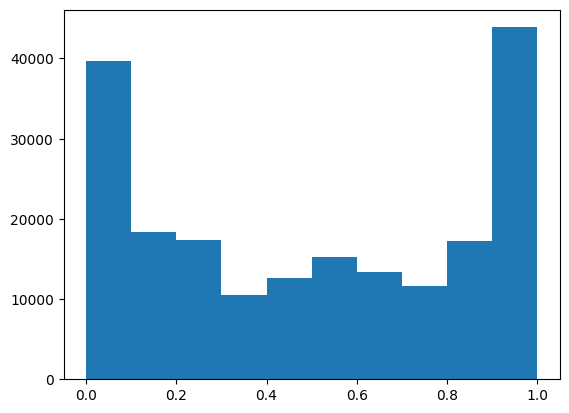

In [96]:
rw_last_zero = last_zero(rw)/(rw.shape[1]-1)
print(f"{rw_last_zero.min()}, {rw_last_zero.max()}")
plt.hist(rw_last_zero)
plt.show()

In [97]:
rw_last_zero = last_zero_2(rw)
rw_last_zero_values, rw_last_zero_cnts = np.unique(rw_last_zero, return_counts=True)
rw_last_zero_probs = rw_last_zero_cnts/rw_last_zero_cnts.sum()
rw_last_zero_values  = rw_last_zero_values.astype(np.float64)/(rw.shape[1]-1)
width = np.diff(rw_last_zero_values).max()

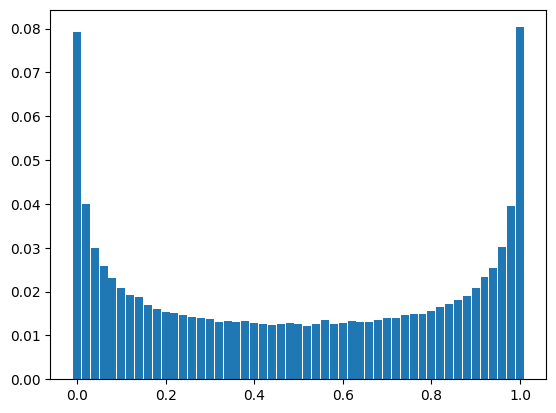

In [98]:
plt.bar(rw_last_zero_values, rw_last_zero_probs, width=0.9*width)
plt.show()

## Magyarázat.

A korábbi számolásból

$$
  \begin{aligned}
    \mathbb{P}(S_{1}\geq 0, \dots S_n\geq 0) &= 
    \mathbb{P}(\min_{k\leq n} S_k\geq 0) = \mathbb{P}(\max_{k\leq n} S_k\leq 0) \\
    &= \mathbb{P}(\max_{k\leq n} S_k= 0) = \mathbb{P}(S_n=0)+\mathbb{P}(S_n=1)\\ 
    &= \mathbb{P}(S_n=0)+\mathbb{P}(S_{n+1}=0)
  \end{aligned}
$$

Innen

$$
    \mathbb{P}(S_{1}> 0, \dots S_n> 0) = \frac12\mathbb{P}(\min_{k\leq n} S_k-S_1\geq 0) = \frac12\left(\mathbb{P}(S_{n-1}=0)+\mathbb{P}(S_{n}=0)\right)
$$

és

$$
  \begin{aligned}
    \mathbb{P}(S_{1}\neq 0, \dots S_n\neq 0) &=
    \mathbb{P}(S_{1}> 0, \dots S_n> 0)+\mathbb{P}(S_{1}< 0, \dots S_n< 0) \\
    & = \mathbb{P}(S_{n-1}=0)+\mathbb{P}(S_{n}=0)
  \end{aligned}
$$

Legyen $n=2k$ páros és $T_n$ az utolsó nullhely az első $n$ lépés során.

Az előző számolásból:

$$
\mathbb{P}(S_{1}\neq 0, \dots S_{2k}\neq 0)= \mathbb{P}(S_{2k}=0)
$$


$$
  \begin{aligned}
    \mathbb{P}(T_n = 2\ell) & =
    \mathbb{P}(S_{2\ell}=0,\, S_{2\ell+i}-S_{2\ell}\neq 0,\, i=1,\dots,2k-2\ell) \\
    & = \mathbb{P}(S_{2\ell}=0)\mathbb{P}(S_{2(n-\ell)}=0)\\
    & = \frac{1}{2^{2\ell}}\binom{2\ell}{\ell}\frac{1}{2^{2(k-\ell)}}\binom{2(k-\ell)}{k-\ell}
  \end{aligned}
$$

HF középiskolából: rekurzió $I_k = \int_0^{\pi/2}\cos^k(\alpha)d\alpha$. Ha ezt felírjuk, kihasználjuk, hogy $I_0=\pi/2$, $I_1=1$, akkor azt kapjuk, hogy
$$
    \frac1{\sqrt{\pi(k+1/2)}}\leq \frac{1}{2^{2k}}\binom{2k}{k}\leq \frac{1}{\sqrt{\pi k}},
    \quad
    \frac1{\sqrt{\pi(k+1/4)}}\approx \frac{1}{2^{2k}}\binom{2k}{k}
$$

Azaz

$$
    \mathbb{P}(T_n=2\ell) \approx \frac{2}{n}\left.\frac{1}{\pi}\cdot\frac1{\sqrt{x(1-x)}}\right|_{x=\frac{2\ell}{n}}
$$

,,Ellenőrizzük'' a kapott formulát

In [99]:
def arcsin_probs(x):
    width = np.diff(rw_last_zero_values).max()
    d = np.zeros_like(x)
    y = (x+0.33*width)*(1-x+0.33*width)
    d[y>0] = width/(np.sqrt(y[y>0])*np.pi)
    return d

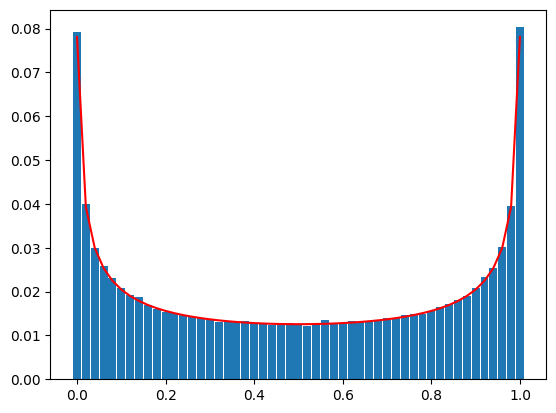

In [101]:
plt.bar(rw_last_zero_values, rw_last_zero_probs, width=0.9*width)
plt.plot(rw_last_zero_values, arcsin_probs(rw_last_zero_values), color='red')
plt.show()

## Variációk `numpy` függvényekre 

Tudunk-e cummulative maximumot számolni `numpy` segítségével?

Ilyen függvényt nem találunk, de teszőleges `ufunc`-ból lehet **accumulált** változatot készíteni.

## Kitérő: `np.ufunc` Univerzális tömb függvények

In [102]:
[method for method in dir(np.ufunc) if not method.startswith("_")]

['accumulate',
 'at',
 'identity',
 'nargs',
 'nin',
 'nout',
 'ntypes',
 'outer',
 'reduce',
 'reduceat',
 'resolve_dtypes',
 'signature',
 'types']

In [103]:
def short_help(f):

    i = f.__doc__.find("Parameters")
    return f.__doc__ if i<0 else f.__doc__[:i]

In [104]:
print(short_help(np.ufunc.accumulate))

accumulate(array, axis=0, dtype=None, out=None)

    Accumulate the result of applying the operator to all elements.

    For a one-dimensional array, accumulate produces results equivalent to::

      r = np.empty(len(A))
      t = op.identity        # op = the ufunc being applied to A's  elements
      for i in range(len(A)):
          t = op(t, A[i])
          r[i] = t
      return r

    For example, add.accumulate() is equivalent to np.cumsum().

    For a multi-dimensional array, accumulate is applied along only one
    axis (axis zero by default; see Examples below) so repeated use is
    necessary if one wants to accumulate over multiple axes.

    


In [105]:
print(short_help(np.ufunc.at))

at(a, indices, b=None, /)

    Performs unbuffered in place operation on operand 'a' for elements
    specified by 'indices'. For addition ufunc, this method is equivalent to
    ``a[indices] += b``, except that results are accumulated for elements that
    are indexed more than once. For example, ``a[[0,0]] += 1`` will only
    increment the first element once because of buffering, whereas
    ``add.at(a, [0,0], 1)`` will increment the first element twice.

    .. versionadded:: 1.8.0

    


In [106]:
print(short_help(np.ufunc.outer))

outer(A, B, /, **kwargs)

    Apply the ufunc `op` to all pairs (a, b) with a in `A` and b in `B`.

    Let ``M = A.ndim``, ``N = B.ndim``. Then the result, `C`, of
    ``op.outer(A, B)`` is an array of dimension M + N such that:

    .. math:: C[i_0, ..., i_{M-1}, j_0, ..., j_{N-1}] =
       op(A[i_0, ..., i_{M-1}], B[j_0, ..., j_{N-1}])

    For `A` and `B` one-dimensional, this is equivalent to::

      r = empty(len(A),len(B))
      for i in range(len(A)):
          for j in range(len(B)):
              r[i,j] = op(A[i], B[j])  # op = ufunc in question

    


In [ ]:
print(short_help(np.ufunc.reduce))

In [ ]:
print(short_help(np.ufunc.reduceat))

In [109]:
# np.maximum.accumulate(rw, axis=1)

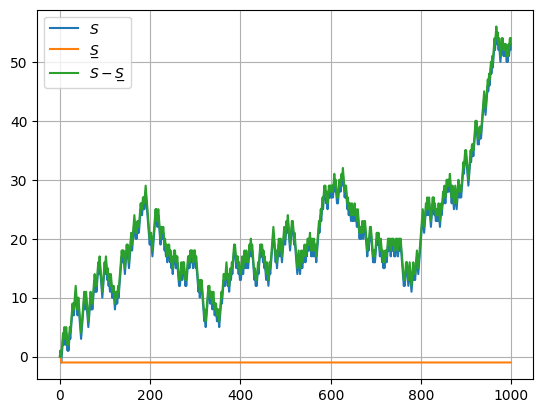

In [108]:
rw = random_walk(1000)[0]
running_min = np.minimum.accumulate(rw, axis=-1)
# rw.shape, running_min.shape
plt.plot(rw, label="$S$")
plt.plot(running_min, label="$S$\u0332")
plt.plot(rw-running_min, label="$S-S\u0332$")
# plt.plot(rw-2*running_min, label="$S-2S\u0332$")
plt.legend()
plt.grid()
plt.show()